In [87]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from matplotlib.cbook import flatten

import numpy as np
import tensorflow as tf

In [88]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [89]:
train_dir = 'C:/aiproject/data/train'
test_dir = 'C:/aiproject/data/test'
validation_dir = 'C:/aiproject/data/validation'

train_books_dir = 'C:/aiproject/data/train/book'
train_clothing_dir = 'C:/aiproject/data/train/clothing'
train_electronics_dir = 'C:/aiproject/data/train/electronic'
train_furniture_dir = 'C:/aiproject/data/train/furniture'

test_books_dir = 'C:/aiproject/data/test/book'
test_clothing_dir = 'C:/aiproject/data/test/clothing'
test_electronics_dir = 'C:/aiproject/data/test/electronic'
test_furniture_dir = 'C:/aiproject/data/test/furniture'

val_books_dir = 'C:/aiproject/data/validation/book'
val_clothing_dir = 'C:/aiproject/data/validation/clothing'
val_electronics_dir = 'C:/aiproject/data/validation/electronic'
val_furniture_dir = 'C:/aiproject/data/validation/furniture'

In [90]:
print("훈련 책 데이터 수 : {}".format(len(os.listdir(train_books_dir))))
print("훈련 옷 데이터 수 : {}".format(len(os.listdir(train_clothing_dir))))
print("훈련 가구 데이터 수 : {}".format(len(os.listdir(train_furniture_dir))))

print("테스트 책 데이터 수 : {}".format(len(os.listdir(test_books_dir))))
print("테스트 옷 데이터 수 : {}".format(len(os.listdir(test_clothing_dir))))
print("테스트 가구 데이터 수 : {}".format(len(os.listdir(test_furniture_dir))))

print("검증 책 데이터 수 : {}".format(len(os.listdir(val_books_dir))))
print("검증 옷 데이터 수 : {}".format(len(os.listdir(val_clothing_dir))))
print("검증 가구 데이터 수 : {}".format(len(os.listdir(val_furniture_dir))))

훈련 책 데이터 수 : 20615
훈련 옷 데이터 수 : 19822
훈련 가구 데이터 수 : 6026
테스트 책 데이터 수 : 3953
테스트 옷 데이터 수 : 1975
테스트 가구 데이터 수 : 1744
검증 책 데이터 수 : 10823
검증 옷 데이터 수 : 8597
검증 가구 데이터 수 : 1576


In [91]:
#스케일링
train_gen = ImageDataGenerator( rescale = 1./255)
val_gen = ImageDataGenerator( rescale = 1./255)
test_gen = ImageDataGenerator( rescale = 1./255)

In [92]:

train_generator = train_gen.flow_from_directory(train_dir,
                              target_size =(64,64),
                              batch_size=32,
                              class_mode = 'categorical')
val_generator = val_gen.flow_from_directory( validation_dir,
                            target_size = (64,64),
                            batch_size=32,
                            class_mode =  'categorical')
test_generator = test_gen.flow_from_directory( test_dir,
                            target_size = (64,64),
                            batch_size=32,
                            class_mode =  'categorical')

Found 46463 images belonging to 3 classes.
Found 20996 images belonging to 3 classes.
Found 7672 images belonging to 3 classes.


In [93]:
c_model = Sequential()

kernelsize = 3
filter = 50


# 입력층(CNN)
# 특징을 도드라지게 해준다
c_model.add(Conv2D(filters = filter, 
                   kernel_size = kernelsize, 
                   input_shape = (64,64,3), 
                   padding = 'same', 
                   activation = 'relu'))
#불필요한 부분 삭제
c_model.add(MaxPooling2D(pool_size = (2,2),strides=2))

c_model.add(Conv2D(filters = filter,
                   kernel_size = kernelsize, 
                   input_shape = (64,64,3), 
                   padding = 'same', 
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2),strides=2))

# 1차원으로 데이터 축소
c_model.add(Flatten())

#은닉층
c_model.add(Dense(units=50, activation = 'relu'))

#출력층
c_model.add(Dense(units=3, activation= 'softmax'))

c_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 50)        1400      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 50)        22550     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 50)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 12800)             0         
                                                                 
 dense_18 (Dense)            (None, 50)               

In [94]:
c_model.compile(loss='categorical_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])


In [95]:
c_history = c_model.fit_generator(train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data = val_generator,
            validation_steps = 5)

Epoch 1/100


C:\Users\k2h2j3\AppData\Local\Temp/ipykernel_14308/2704360159.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  c_history = c_model.fit_generator(train_generator,


100/100 [==============================] - 10s 97ms/step - loss: 0.4917 - accuracy: 0.8106 - val_loss: 0.2306 - val_accuracy: 0.9438
Epoch 2/100
100/100 [==============================] - 10s 101ms/step - loss: 0.3398 - accuracy: 0.8784 - val_loss: 0.2486 - val_accuracy: 0.9187
Epoch 3/100
100/100 [==============================] - 10s 100ms/step - loss: 0.2917 - accuracy: 0.9000 - val_loss: 0.1851 - val_accuracy: 0.9625
Epoch 4/100
100/100 [==============================] - 10s 99ms/step - loss: 0.2754 - accuracy: 0.9025 - val_loss: 0.2774 - val_accuracy: 0.9187
Epoch 5/100
100/100 [==============================] - 11s 107ms/step - loss: 0.2557 - accuracy: 0.9153 - val_loss: 0.1700 - val_accuracy: 0.9500
Epoch 6/100
100/100 [==============================] - 10s 100ms/step - loss: 0.2166 - accuracy: 0.9281 - val_loss: 0.1355 - val_accuracy: 0.9625
Epoch 7/100
100/100 [==============================] - 10s 103ms/step - loss: 0.2179 - accuracy: 0.9291 - val_loss: 0.1957 - val_accuracy:

Epoch 57/100
100/100 [==============================] - 10s 98ms/step - loss: 0.0434 - accuracy: 0.9850 - val_loss: 0.2936 - val_accuracy: 0.9375
Epoch 58/100
100/100 [==============================] - 10s 99ms/step - loss: 0.0680 - accuracy: 0.9769 - val_loss: 0.1994 - val_accuracy: 0.9250
Epoch 59/100
100/100 [==============================] - 10s 100ms/step - loss: 0.0556 - accuracy: 0.9803 - val_loss: 0.0714 - val_accuracy: 0.9563
Epoch 60/100
100/100 [==============================] - 10s 101ms/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.1161 - val_accuracy: 0.9812
Epoch 61/100
100/100 [==============================] - 10s 100ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.1559 - val_accuracy: 0.9438
Epoch 62/100
100/100 [==============================] - 10s 99ms/step - loss: 0.0504 - accuracy: 0.9853 - val_loss: 0.0780 - val_accuracy: 0.9750
Epoch 63/100
100/100 [==============================] - 10s 100ms/step - loss: 0.0474 - accuracy: 0.9828 - val_loss: 0.15

[]

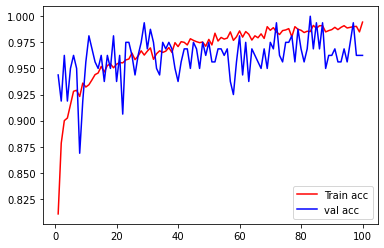

In [96]:
import matplotlib.pyplot as plt
acc = c_history.history['accuracy']
val_acc = c_history.history['val_accuracy']

epoch = range(1, len(acc)+1) #정확도의 개수

plt.plot(epoch, acc, c='red', label = 'Train acc') # 훈련 데이터 정확도
plt.plot(epoch, val_acc, c= 'blue', label = 'val acc') # 검증 데이터 정확도
plt.legend() #범례
plt.plot()

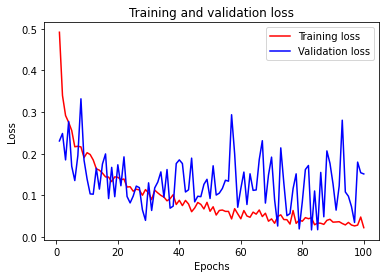

In [97]:
loss = c_history.history['loss']
val_loss = c_history.history['val_loss']

plt.plot(epoch, loss, 'red', label='Training loss')
plt.plot(epoch, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()